In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
npts = 100
xlow = -np.pi
xhigh = np.pi

x = np.linspace(xlow,xhigh,npts)
dt = (xhigh-xlow)/npts

# Calculate the Nyquist frequency

f_sampling = 1.0/dt
f_nyquist = f_sampling/2.0

print ('Nyquist frequency = ',f_nyquist)

# the Nyquist frequency corresponds to the highest meaningful frequency component
#
# The terms in the Fourier approximation look like cos(n*np.pi*t/P) or sin(n*np.pi*t/P)
#
# Thus, omega = n*np.pi/P = n*np.pi/xhigh
#       f = omega/(2.0*np.pi) = n/(2.0*xhigh)
#
#       f_nyquist = n_max/(2.0*xhigh)
#
#       n_max = 2.0*xhigh*f_nyquist

nterms = int(2.0*xhigh*f_nyquist)

print ('Max terms = ',nterms)

nterms = 50

Nyquist frequency =  7.957747154594767
Max terms =  50


In [45]:
fx = []
for i in range(len(x)):
    if x[i]<0:
        fx.append(0)
    else:
        fx.append(np.pi-x[i])

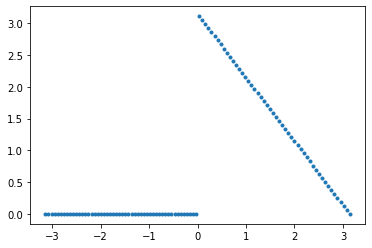

In [46]:
plt.plot(x,fx,'.')

In [47]:
x2 = np.linspace(xlow,xhigh,npts)
fx_fourier = np.zeros(len(x2))
fx_fourier_theory = np.zeros(len(x2))

n = []
an = []
bn = []
ant = []
bnt = []

for i in range(nterms+1):

    n.append(i/(2*np.pi))
    

    # Method 1:  Calculate coefficients from known
    # function, f(x), by doing the integrals by hand
        
    a0 = np.pi/2
        
    if (i==0):
        ant.append(a0)
        bnt.append(0)
    else:
        ant.append((1-(-1)**i)/(i**2*np.pi))
        bnt.append(1/i)
        
    for j in range(len(x2)):
        if i==0:
            fx_fourier_theory[j] = fx_fourier_theory[j]+ant[0]/2.0
        else:
            if (j==0 and i<=10): 
                print ("Theory: n = %0.4f, a_n = %0.4f, bn = %0.4f" % (i,ant[i],bnt[i]))
            fx_fourier_theory[j] = fx_fourier_theory[j]+ant[i]*np.cos(i*x2[j])+bnt[i]*np.sin(i*x2[j])
        
    # Method 2:  Numerical integration to calculate
    # the coefficients
    
    a0sum = 0.0
    ansum = 0.0
    bnsum = 0.0
    P = xhigh
    for k in range(len(x2)):
        a0sum = a0sum + 1/P*fx[k]*dt
        ansum = ansum + 1/P*fx[k]*np.cos(i*x2[k])*dt
        bnsum = bnsum + 1/P*fx[k]*np.sin(i*x2[k])*dt
        
    if (i==0):
        an.append(a0sum)
        bn.append(0)
    else:
        an.append(ansum)
        bn.append(bnsum)   
        
    for j in range(len(x2)):
        if i==0:
            fx_fourier[j] = fx_fourier[j]+an[0]/2.0
        else:
            if (j==0 and i<=10): 
                print ("Data: n = %0.4f, a_n = %0.4f, bn = %0.4f" % (i,an[i],bn[i]))
            fx_fourier[j] = fx_fourier[j]+an[i]*np.cos(i*x2[j])+bn[i]*np.sin(i*x2[j])        

Theory: n = 1.0000, a_n = 0.6366, bn = 1.0000
Data: n = 1.0000, a_n = 0.6303, bn = 0.9902
Theory: n = 2.0000, a_n = 0.0000, bn = 0.5000
Data: n = 2.0000, a_n = -0.0002, bn = 0.4953
Theory: n = 3.0000, a_n = 0.0707, bn = 0.3333
Data: n = 3.0000, a_n = 0.0701, bn = 0.3305
Theory: n = 4.0000, a_n = 0.0000, bn = 0.2500
Data: n = 4.0000, a_n = -0.0002, bn = 0.2482
Theory: n = 5.0000, a_n = 0.0255, bn = 0.2000
Data: n = 5.0000, a_n = 0.0253, bn = 0.1988
Theory: n = 6.0000, a_n = 0.0000, bn = 0.1667
Data: n = 6.0000, a_n = -0.0002, bn = 0.1660
Theory: n = 7.0000, a_n = 0.0130, bn = 0.1429
Data: n = 7.0000, a_n = 0.0129, bn = 0.1426
Theory: n = 8.0000, a_n = 0.0000, bn = 0.1250
Data: n = 8.0000, a_n = -0.0002, bn = 0.1251
Theory: n = 9.0000, a_n = 0.0079, bn = 0.1111
Data: n = 9.0000, a_n = 0.0078, bn = 0.1115
Theory: n = 10.0000, a_n = 0.0000, bn = 0.1000
Data: n = 10.0000, a_n = -0.0002, bn = 0.1007


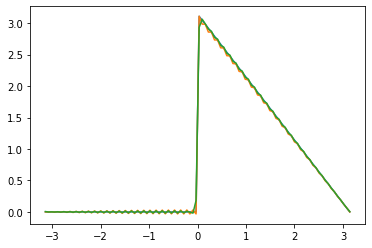

In [48]:
plt.plot(x,fx)
plt.plot(x2,fx_fourier)
plt.plot(x2,fx_fourier_theory)

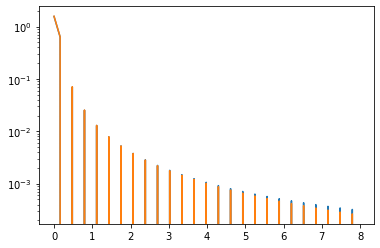

In [49]:
plt.plot(n,an)
plt.plot(n,ant)
plt.yscale("log")

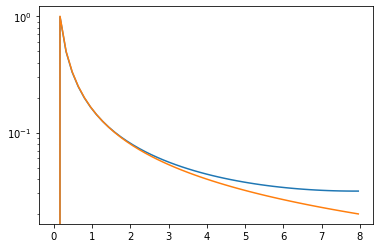

In [50]:
plt.plot(n,bn)
plt.plot(n,bnt)
plt.yscale("log")